<a href="https://colab.research.google.com/github/albert-h-wong/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survival_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"

!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1
34,60,1,1
34,61,10,1
34,67,7,1
34,60,0,1
35,64,13,1
35,63,0,1
36,60,1,1
36,69,0,1
37,60,0,1
37,63,0,1
37,58,0,1
37,59,6,1
37,60,15,1
37,63,0,1
38,69,21,2
38,59,2,1
38,60,0,1
38,60,0,1
38,62,3,1
38,64,1,1
38,66,0,1
38,66,11,1
38,60,1,1
38,67,5,1
39,66,0,2
39,63,0,1
39,67,0,1
39,58,0,1
39,59,2,1
39,63,4,1
40,58,2,1
40,58,0,1
40,65,0,1
41,60,23,2
41,64,0,2
41,67,0,2
41,58,0,1
41,59,8,1
41,59,0,1
41,64,0,1
41,69,8,1
41,65,0,1
41,65,0,1
42,69,1,2
42,59,0,2
42,58,0,1
42,60,1,1
42,59,2,1
42,61,4,1
42,62,20,1
42,65,0,1
42,63,1,1
43,58,52,2
43,59,2,2
43,64,0,2
43,64,0,2
43,63,14,1
43,64,2,1
43,64,3,1
43,60,0,1
43,63,2,1
43,65,0,1
43,66,4,1
44,64,6,2
44,58,9,2
44,63,19,2
44,61,0,1
44,63,1,1
44,61,0,1
44,67,16,1
45,65,6,2
45,66,0,2
45,67,1,2
45,60,0,1
45,67,0,1
45,59,14,1
45,64,0,1
45,68,0,1
45,67,1,1
46,58,2,2
46,69,3,2
46,62,5,2
46,65,20,2
46,62,0,1
46,58,3,1
46,63,0,1
47,63,23,2
47,62,0,2
47,6

In [62]:
# Read the data, change the labels to be readable and check the data shape and type

survival_data = pd.read_csv(survival_data_url, header=None)

labels = ['Age','Year','Nodes','Survival']
survival_data.columns = labels

print(survival_data.shape)
print(survival_data.dtypes)

(306, 4)
Age         int64
Year        int64
Nodes       int64
Survival    int64
dtype: object


In [63]:
# Check for missing values

survival_data.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [64]:
# Survival variable is altered for traditional binary notation

survival_data.Survival.replace(2,0,inplace=True)
survival_data.Survival

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: Survival, Length: 306, dtype: int64

In [65]:
# Data head displayed though the change in survival class does not show up the
# first 5 rows

survival_data.head(5)

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [66]:
# Check the summary statistics of the variables for insight

survival_data.describe()

,Age,Year,Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


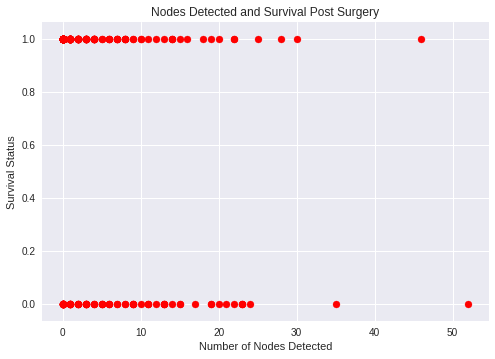

In [67]:
# Begin plotting some variables to get a general view of the data

plt.scatter(survival_data['Nodes'], survival_data['Survival'], color='red')
plt.xlabel('Number of Nodes Detected')
plt.ylabel('Survival Status')
plt.title("Nodes Detected and Survival Post Surgery")
plt.show()

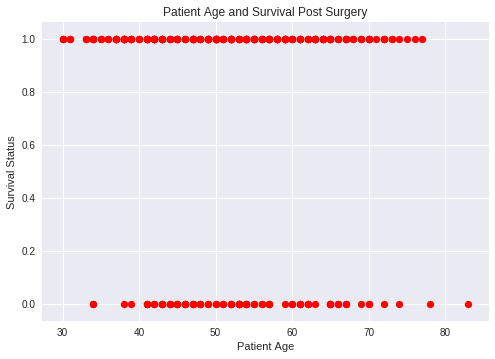

In [68]:
# Continued plotting some variables to get a general view of the data

plt.scatter(survival_data['Age'], survival_data['Survival'], color='red')
plt.xlabel('Patient Age')
plt.ylabel('Survival Status')
plt.title("Patient Age and Survival Post Surgery")
plt.show()

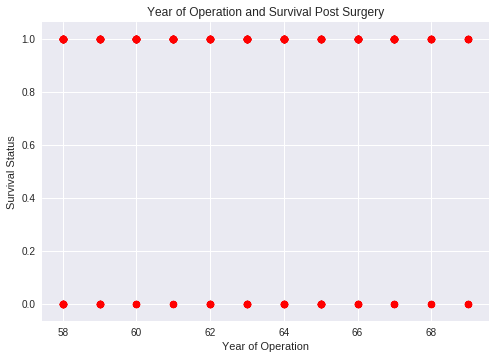

In [69]:
# Continued plotting some variables to get a general view of the data

plt.scatter(survival_data['Year'], survival_data['Survival'], color='red')
plt.xlabel('Year of Operation')
plt.ylabel('Survival Status')
plt.title("Year of Operation and Survival Post Surgery")
plt.show()

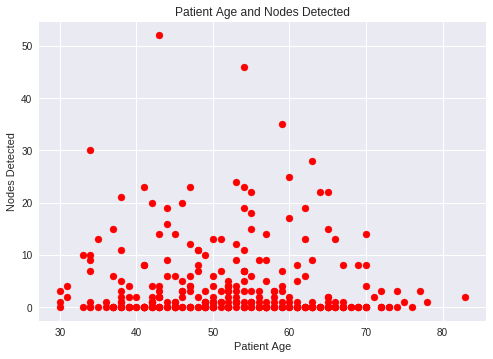

In [70]:
# Continued plotting some variables to get a general view of the data

plt.scatter(survival_data['Age'], survival_data['Nodes'], color='red')
plt.xlabel('Patient Age')
plt.ylabel('Nodes Detected')
plt.title("Patient Age and Nodes Detected")
plt.show()

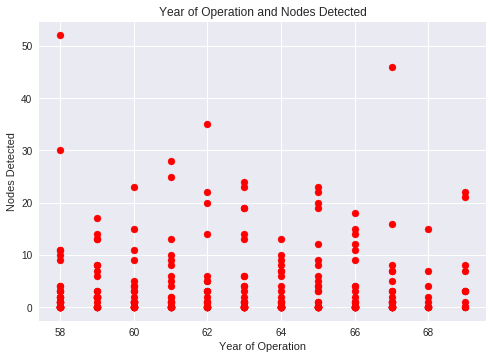

In [71]:
# Continued plotting some variables to get a general view of the data

plt.scatter(survival_data['Year'], survival_data['Nodes'], color='red')
plt.xlabel('Year of Operation')
plt.ylabel('Nodes Detected')
plt.title("Year of Operation and Nodes Detected")
plt.show()

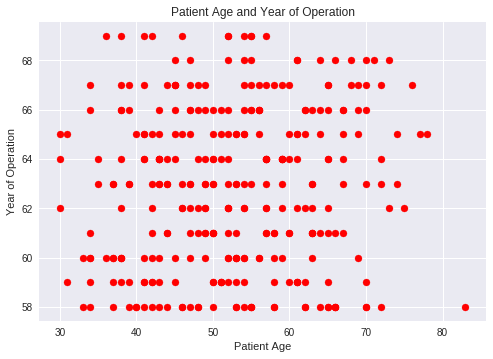

In [72]:
# Continued plotting some variables to get a general view of the data

plt.scatter(survival_data['Age'], survival_data['Year'], color='red')
plt.xlabel('Patient Age')
plt.ylabel('Year of Operation')
plt.title("Patient Age and Year of Operation")
plt.show()

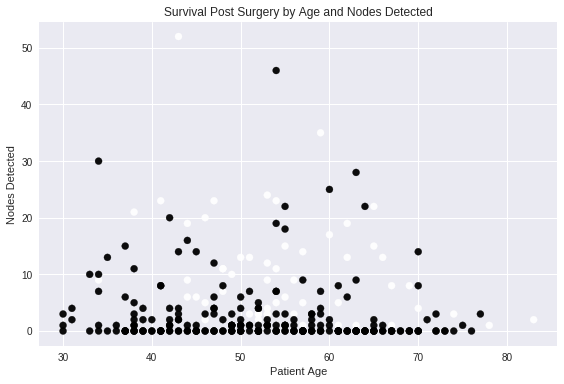

In [73]:
# Took a look at the 3 key variables - Survival as the dependent variable and
# how age and nodes detected impacts it

color = survival_data.Survival

fig, ax = plt.subplots()
ax.scatter(survival_data['Age'], survival_data['Nodes'], c=color, alpha=0.95)

ax.set_xlabel('Patient Age')
ax.set_ylabel('Nodes Detected')
ax.set_title('Survival Post Surgery by Age and Nodes Detected')

ax.grid(True)
fig.tight_layout()


plt.show()

In [0]:
# Binned variables for closer analysis

age_bins = pd.cut(survival_data['Age'], 6)  
node_bins = pd.cut(survival_data['Nodes'], 3)
node_bins2 = pd.cut(survival_data['Nodes'], 5)

In [75]:
pd.crosstab(age_bins, [node_bins, survival_data.Survival])

Nodes            (-0.052, 17.333]     (17.333, 34.667]    (34.667, 52.0]   
Survival                        0   1                0  1              0  1
Age                                                                        
(29.947, 38.833]                2  30                1  1              0  0
(38.833, 47.667]               18  49                4  1              1  0
(47.667, 56.5]                 25  59                2  3              0  1
(56.5, 65.333]                 14  51                2  3              1  0
(65.333, 74.167]                9  24                0  0              0  0
(74.167, 83.0]                  2   3                0  0              0  0

In [76]:
pd.crosstab(survival_data.Survival, [node_bins, age_bins], normalize='columns')

Nodes    (-0.052, 17.333]                                                 \
Age      (29.947, 38.833] (38.833, 47.667] (47.667, 56.5] (56.5, 65.333]   
Survival                                                                   
0                  0.0625         0.268657       0.297619       0.215385   
1                  0.9375         0.731343       0.702381       0.784615   

Nodes                                    (17.333, 34.667]                   \
Age      (65.333, 74.167] (74.167, 83.0] (29.947, 38.833] (38.833, 47.667]   
Survival                                                                     
0                0.272727            0.4              0.5              0.8   
1                0.727273            0.6              0.5              0.2   

Nodes                                                                   \
Age      (47.667, 56.5] (56.5, 65.333] (65.333, 74.167] (74.167, 83.0]   
Survival                                                                 
0                   0.4            0.4              0.0            0.0   
1                   0.6            0.6              0.0            0.0   

Nodes      (34.667, 52.0]                                                 \
Age      (29.947, 38.833] (38.833, 47.667] (47.667, 56.5] (56.5, 65.333]   
Survival                                                                   
0                     0.0              1.0            0.0            1.0   
1                     0.0              0.0            1.0            0.0   

Nodes                                     
Age      (65.333, 74.167] (74.167, 83.0]  
Survival                                  
0                     0.0            0.0  
1                     0.0            0.0

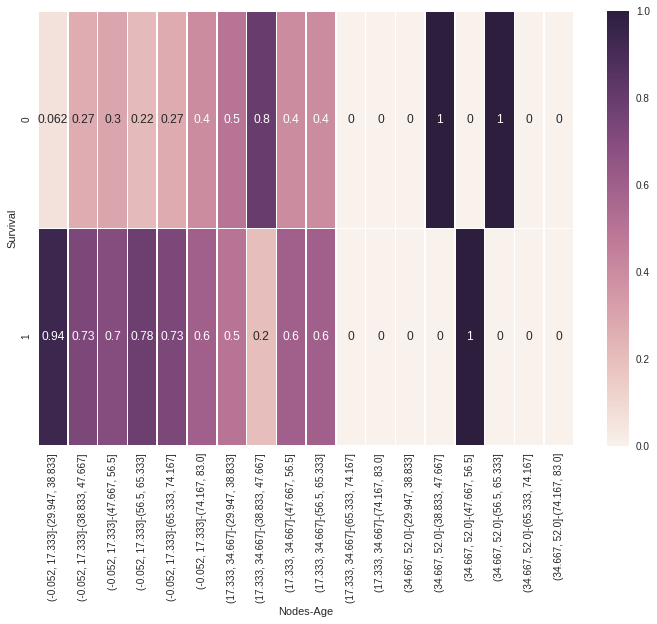

In [77]:
ct_survival_data = pd.crosstab(survival_data.Survival, [node_bins, 
                                    age_bins],
                                    normalize='columns')

fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(ct_survival_data, annot=True,linewidths=.5, ax=ax);

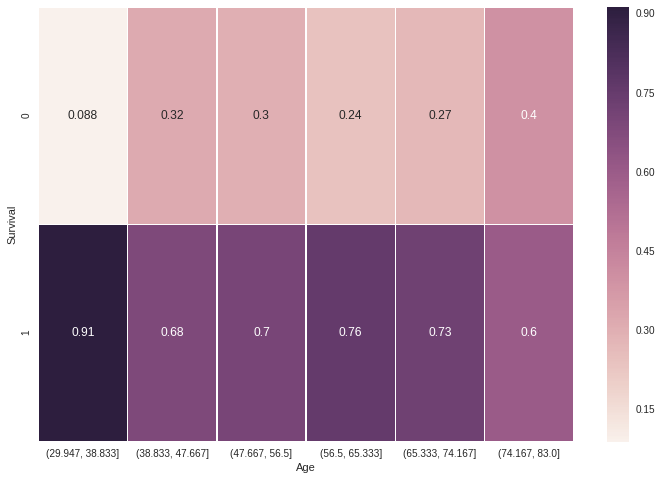

In [78]:
ct_survival_data2 = pd.crosstab(survival_data.Survival, [
                                    age_bins],
                                    normalize='columns')

fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(ct_survival_data2, annot=True,linewidths=.5, ax=ax);

In [79]:
pd.crosstab(node_bins2, survival_data.Survival)

Survival,0,1
Nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


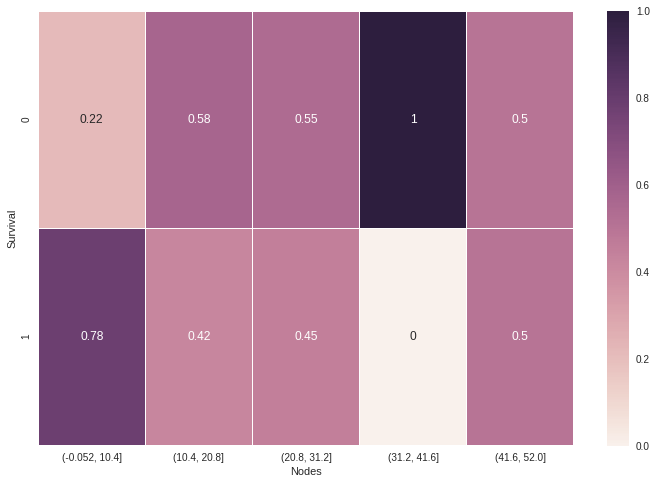

In [80]:
# Heatmap on Survival and Nodes detected

ct_survival_data3 = pd.crosstab(survival_data.Survival, [
                                    node_bins2],
                                    normalize='columns')

fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(ct_survival_data3, annot=True,linewidths=.5, ax=ax);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?

The age of the patient appears to have the strongest positive correlation with survival. The younger the age of the patient that underwent surgery the higher the relative survival rate. In general the surgery results were greater than ~60% success even at the oldest age segment, but there is a higher relative survival rate for patients that were between the ages of 30 and 39 (91% see age and survival heatmap). This could be an indication that early detection and regular screening is very important for increasing the rate of breast cancer survival. There was also some correlation although not very strong that the younger age patients did not exhibit as many nodes detected, which could suggest early detection prevented the cancer from spreading. However since there are many patients that have fewer than 17 nodes detected at a higher age, it cannot be ruled out that many patients simply also don't develop the cancer until a later age. There is also still a need for further investigation as the death of the patient was unspecifed to be directly related to breast cancer or whether it could be from other causes. 

- What is at least one feature that looks to have a negative correlation with survival?

The number of positive nodes detected had a more negative correlation with survival. As we would expect, the more nodes detected could indicate a higher severity in the case and also potentially the late detection and therefore late phase of the cancer at the time of surgery. As shown in the nodes bin and survival heatmap with more than 10 nodes detected the relative success of the surgery for future survival drops tremendously to 50% or less. The sample size however is quite small to firmly draw a conclusion.

- How are those two features related with each other, and what might that mean?

As noted above the number of nodes detected and age may have major indications on the value of early detection of the cancer. Despite being a younger age, the crosstab heatmeat above shows that survival rate drops when there are more than 17 nodes detected. The implication points to a change in preventative medicine to encourage women to screen for breast cancer regularly and starting at a younger age so they can detect any health issue both at a younger age where they might be more equipped to battle the disease and before the cancer spreads which in combination will greatly increase their rate of survival.

